<a href="https://colab.research.google.com/github/phystopia/thermodynamics/blob/main/work_thermo_processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Work in Thermodynamic Processes

## Setup

### Importing the Necessary Packages

The notebook begins focusing on importing necessary libraries and setting up an environment conducive to data analysis and visualization in thermodynamics. <br>
Here, we import essential libraries for numerical calculations, data manipulation, and visualization. Specifically, it imports **numpy** for numerical operations, **pandas** for data manipulation, **seaborn** and **matplotlib.pyplot** for data visualization, and **scipy.integrate** for integration tasks. These libraries are fundamental to data analysis and scientific computing in Python.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from   scipy import integrate

### Seaborn Theme Configuration



The next cell configures the visual theme for seaborn, which is a visualization library built on top of matplotlib. <br>
The chosen settings specify the context, style, palette, font, font scale, and color codes. This configuration ensures that the plots generated in the notebook have a consistent and appealing appearance, enhancing readability and interpretability.

In [ ]:
# Uses seaborn to update matplotlib's run commands (rc) parameters to improve aesthetics

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

### Numerical Integration

**Numerical Integration for Work Calculations**

In various thermodynamic processes, evaluating work can be done through integration. Since analytical solutions may not always be available, numerical methods like those offered by `scipy.integrate` become valuable tools. We'll explore two common options: <br>

**Trapezoidal Rule:** <br>

This method approximates the integral by dividing the area under the curve into trapezoids. It's simple and efficient but less accurate for complex functions. <br>

`from scipy import integrate # imports the integration methods included in scipy`

`w_trapz = integrate.trapz(P12_isothermal, V12)  # Calculate work using trapezoidal rule`

This uses the trapezoidal rule to approximate the integral. It's a simple and efficient method for many cases. <br>

**Simpson's Rule:** <br>

More accurate than the trapezoidal rule, Simpson's rule uses parabolic segments to approximate the curve. This comes at the cost of requiring more function evaluations. <br>

`w_simps = integrate.simps(P12_isothermal, V12)  # Calculate work using Simpson's rule` <br>

These methods give us two approximate values for the work done (*w_trapz* and *w_simps*). By comparing them with the formula-based result and understanding the trade-offs of each method, we can choose the most suitable approach for our specific problem. <br>

To be able to experiment with these integration methods and find which one gives us the best accuracy for our specific problem, we will write here this line of code:

`int_method = integrate.trapz  # Or integrate.simps` <br>

In this way, when we want to find the work by numerical integration, we will use the following line of code: <br>

`w = int_method(P12_isothermal, V12)`<br>

This flexibility allows for easy experimentation with different numerical integration techniques, which can be crucial in thermodynamics for calculating work done in processes, areas under curves, and other integrals.

**Additional Notes:**

* `scipy.integrate` offers other methods like `quad` and `dblquad` for more complex scenarios.
* Experimenting with different methods can help determine the best balance between accuracy and computational efficiency for every specific case.


In [ ]:
# Choose the desired integration method:

int_method = integrate.trapz  # Or integrate.simps

## Problem

> Example 2.1 Evaluating Moving-Boundary Work.
> **Moran *et al***. *Fundamentals of Engineering Thermodynamics*.

A gas in a piston–cylinder assembly undergoes an expansion process for which the relationship between pressure and volume is given by

$$ P \cdot V^n = \mathsf{constant} $$ <br>

The **initial pressure** is $3.0 \, \mathrm{bar}$, the **initial volume** is $0.10 \, \mathrm{m^3}$, and the **final volume** is $0.20 \, \mathrm{m^3}$. <br>

- Determine the final pressure and work for the process if: <br>

    - *n* = 0
    - *n* = 1.0
    - *n* = 1.3
    - *n* = *k* = 1.667 $(k = \frac{c_p}{c_v})$
    - *n* = $\infty$ <br>

- Plot the $P-V$ curve for each case.

## Solution

- **Known:** A gas in a piston–cylinder assembly undergoes an expansion for which

$$ P \cdot V^n = \mathsf{constant} $$

- For each value of *n*, the constant can be determined using the initial conditions. Depending on the value of *n*, the result of the integration to solve for work *W* will be different.

- **Handling Special Cases**: The cases where *n* = 0, *n* = 1, *n* = 1.3, *n = k* = 1.667, and *n* = ∞ cover a range of physical processes, from isobaric through isothermal, polytropic, adiabatic, to isochoric processes in the limit cases. Each scenario might necessitate a different approach based on the characteristics of the process.

- **Find:** Evaluate the work for different values of the exponent *n*.

- **Visualization**: The given *P-V* relationships and the given data for pressure and volume can be used to construct the *Pressure–Volume* diagram of the processes. <br> Plotting the $P−V$ curve for each case can greatly enhance understanding, showing how different values of *n* influence the process path. Visualizing these paths will also help in intuitively understanding the work done as the area under the curve in a $P−V$ diagram.

- **Engineering Model:**
> 1. The gas is a closed system.
> 2. The moving boundary is the only work mode.
> 3. The expansion is a polytropic process.

### Known Values

The given data are the initial pressure $(P_1)$ and volume $(V_1)$, as well as the final volume $(V_2)$. <br>

First, is necesary to convert $P_1$  from $\mathrm{bar}$ to $\mathrm{kPa}$: <br>

$$ P_1 = 3 \, \mathrm{bar} \cdot \frac{100 \, \mathrm{kPa}}{1 \, \mathrm{bar}} = 300 \, \mathrm{kPa} $$

In [ ]:
P1 = 300
print(f'P₁: {P1} kPa')

P₁: 300 kPa


In [ ]:
V1 = 0.1
print(f'V₁: {V1} m³')

V₁: 0.1 m³


In [ ]:
V2 = 0.2
print(f'V₂: {V2} m³')

V₂: 0.2 m³


----

# $\Delta P = 0$ : Isobaric Process Analysis for $n = 0$

In the scenario where the polytropic exponent $n = 0$, we observe a specific case of a thermodynamic process: the isobaric process. This process is characterized by constant pressure throughout, simplifying the relationship between pressure and volume to $P = \mathsf{constant}$.

## Theoretical Background

The condition $n = 0$ simplifies the polytropic equation to one of constant pressure:

$$ n = 0 \to P = \text{constant} $$

This implies that the work done during the process can be calculated directly without the need for integration, utilizing the formula for work in an isobaric process:

$$
W_{1 \to 2} = P \cdot (V_2 - V_1)
$$

where $P$ is the constant pressure, and $V_1$ and $V_2$ are the initial and final volumes, respectively.

## Implementation in Python

First, we define the condition and confirm the isobaric process by setting *n* to 0.

In [ ]:
# Define the exponent for an isobaric process
n_isobaric = 0
print(f'n (isobaric): {n_isobaric}')

n (isobaric): 0


### Pressure @ state 2

The pressure at state 2 will be the same as the pressure at state 1:

$$ P_2 = P_1 $$

In [ ]:
# Pressure remains constant throughout the process
P2_isobaric = P1
print(f'Pressure at State 2: {P2_isobaric} kPa')

Pressure at State 2: 300 kPa


### Work

The work done in this isobaric process is then:

$$ W_{\mathrm{isobaric}}= P_1 \cdot \left( V_2 - V_1 \right) $$

In [ ]:
# Calculate work for the isobaric process
W_isobaric = P1 * (V2 - V1)
print(f'Work done (Isobaric Process): {W_isobaric} kJ')

Work done (Isobaric Process): 30.0 kJ


### Validation through Numerical Integration

Even though the analytical approach provides a clear result, we validate it using numerical integration to ensure consistency and to demonstrate the applicability of numerical methods.

#### Arrays

To perform the numerical integration, first we create the arrays both for volume and pressure:

In [ ]:
# Prepare arrays for numerical integration
points = 500
V12 = np.linspace(V1, V2, points)
P12_isobaric = np.full(points, P1)  # Use np.full for constant pressure. It essentially creates a Numpy array that is “full” of the same value.

#### Work by numerical integration

Numerical integration gives the following result:

In [ ]:
# Calculate work using numerical integration
W_isobaric_numerical = int_method(P12_isobaric, V12)
print(f'Work by Numerical Integration: {W_isobaric_numerical:.2f} kJ')

Work by Numerical Integration: 30.00 kJ


This approach not only validates the analytical calculation but also introduces a method to tackle more complex scenarios where an analytical solution might not be readily available.

## $P-V$ Diagram

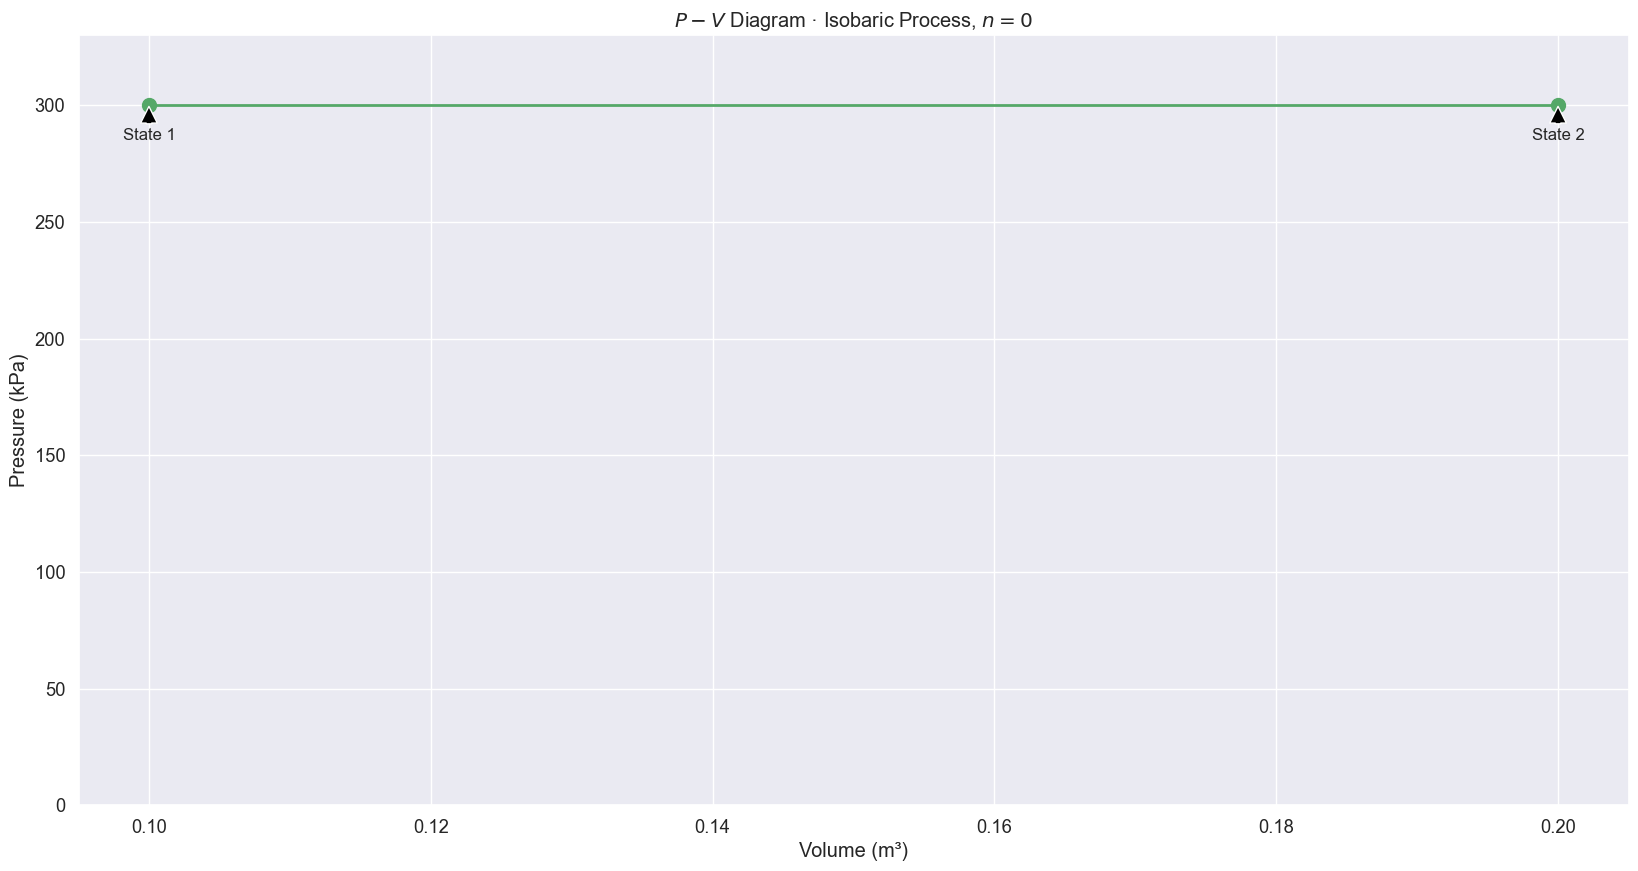

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title(r'$P-V$ Diagram · Isobaric Process, $n = 0$')

# Dynamically adjust the y-axis limit based on max pressure + margin
ax.set_ylim(0, 1.08 * P1)

# Isobaric process plot
ax.plot(V12, P12_isobaric, 'g-', linewidth=2, label=r'Isobaric Process $n=0$')

# State markers
ax.plot(V1, P1, 'go', markersize=10)  # State 1
ax.plot(V2, P2_isobaric, 'go', markersize=10)  # State 2

# Adjust annotations to appear below the points
ax.annotate('State 1', xy=(V1, P1), xytext=(V1, P1 * 0.95),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

ax.annotate('State 2', xy=(V2, P2_isobaric), xytext=(V2, P2_isobaric * 0.95),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

# Set axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel('Volume (m³)')

ax.grid(True)  # Enable grid
# ax.legend(loc='upper right')  # Show legend and adjusts its position to minimize overlap

plt.show()

## Insights and Physical Interpretation

The isobaric process illustrates a scenario where the system does work by expanding at a constant pressure. This type of process is common in many practical engineering applications, such as the expansion of gases in pistons at constant atmospheric pressure. The ability to calculate work in such a process is fundamental to understanding energy transfer in thermodynamic systems.

By comparing the analytical and numerical results, we reinforce our confidence in the calculations and the physical principles underlying the isobaric process. This dual approach —analytical and numerical— offers a robust framework for analyzing thermodynamic processes in future practical contexts.

---

# $\Delta T = 0$ : Isothermal Process Analysis for $n = 1$

When the exponent *n* equals 1, we encounter an isothermal process, characterized by constant temperature throughout the system. This condition leads to a specific pressure-volume relationship, $P \cdot V = \mathsf{constant}$, illustrating that as the volume of a gas changes, its pressure changes inversely to maintain a constant temperature.

## Theoretical Background

The isothermal condition implies that the energy added to the system as work is used entirely for changing the internal energy, keeping the temperature constant. Mathematically, this is represented as:

$$ n=1 \to P \: V = C $$

$$ W_{1\to2} = \int _1 ^2 P \: dV = C \int _1 ^2 \frac{dV}{V} $$

$ W_{1 \to 2} = C \: \Bigg[ \ln \, V \Bigg] _{V_1} ^{V_2} $

$$ W_{1 \to 2} = C \: \ln \frac{V_2}{V_1} $$

## Implementation in Python

First, we define the condition and confirm the isothermal process by setting *n* to 1.

In [ ]:
# Define the exponent for an isothermal process
n_isothermal = 1.0
print(f'n (isothermal): {n_isothermal}')

n (isothermal): 1.0


### Pressure @ state 2

Now, we define the condition for an isothermal process and calculate the constant *C* using the initial conditions.

In [ ]:
# Calculate the constant C using initial conditions
C_isothermal = P1 * V1
print(f'Constant C (Isothermal): {C_isothermal} kJ')

Constant C (Isothermal): 30.0 kJ


We can determine the pressure at state 2 given the relationship $P \:V = C$.

$$ P_2 \: V_2 = C \to P_2 = \frac{C}{V_2}$$

In [ ]:
# Calculate pressure at state 2 using the isothermal relationship
P2_isothermal = C_isothermal / V2
print(f'Pressure at State 2 (Isothermal): {P2_isothermal} kPa')

Pressure at State 2 (Isothermal): 150.0 kPa


### Work

The work in an isothermal process is:

$$ W_{\mathrm{isothermal}} = C \cdot \ln \Big( \frac{V_2}{V_1} \Big) $$

In [ ]:
# Calculate work for the isothermal process
W_isothermal = C_isothermal * np.log(V2 / V1)
print(f'Work done (Isothermal Process): {W_isothermal:.2f} kJ')

Work done (Isothermal Process): 20.79 kJ


### Validation through Numerical Integration

The work done in an isothermal process can also be validated through numerical integration, providing a practical application of theoretical principles.

#### Arrays

In [ ]:
# Prepare volume and pressure arrays for numerical integration
points = 500
V12 = np.linspace(V1, V2, points)
P12_isothermal = P1 * V1 / V12

#### Work by numerical integration

Numerical integration gives the following result:

In [ ]:
# Perform numerical integration to calculate work
W_isothermal_numerical = int_method(P12_isothermal, V12)
print(f'Work by Numerical Integration: {W_isothermal_numerical:.2f} kJ')

Work by Numerical Integration: 20.79 kJ


## $P-V$ Diagram

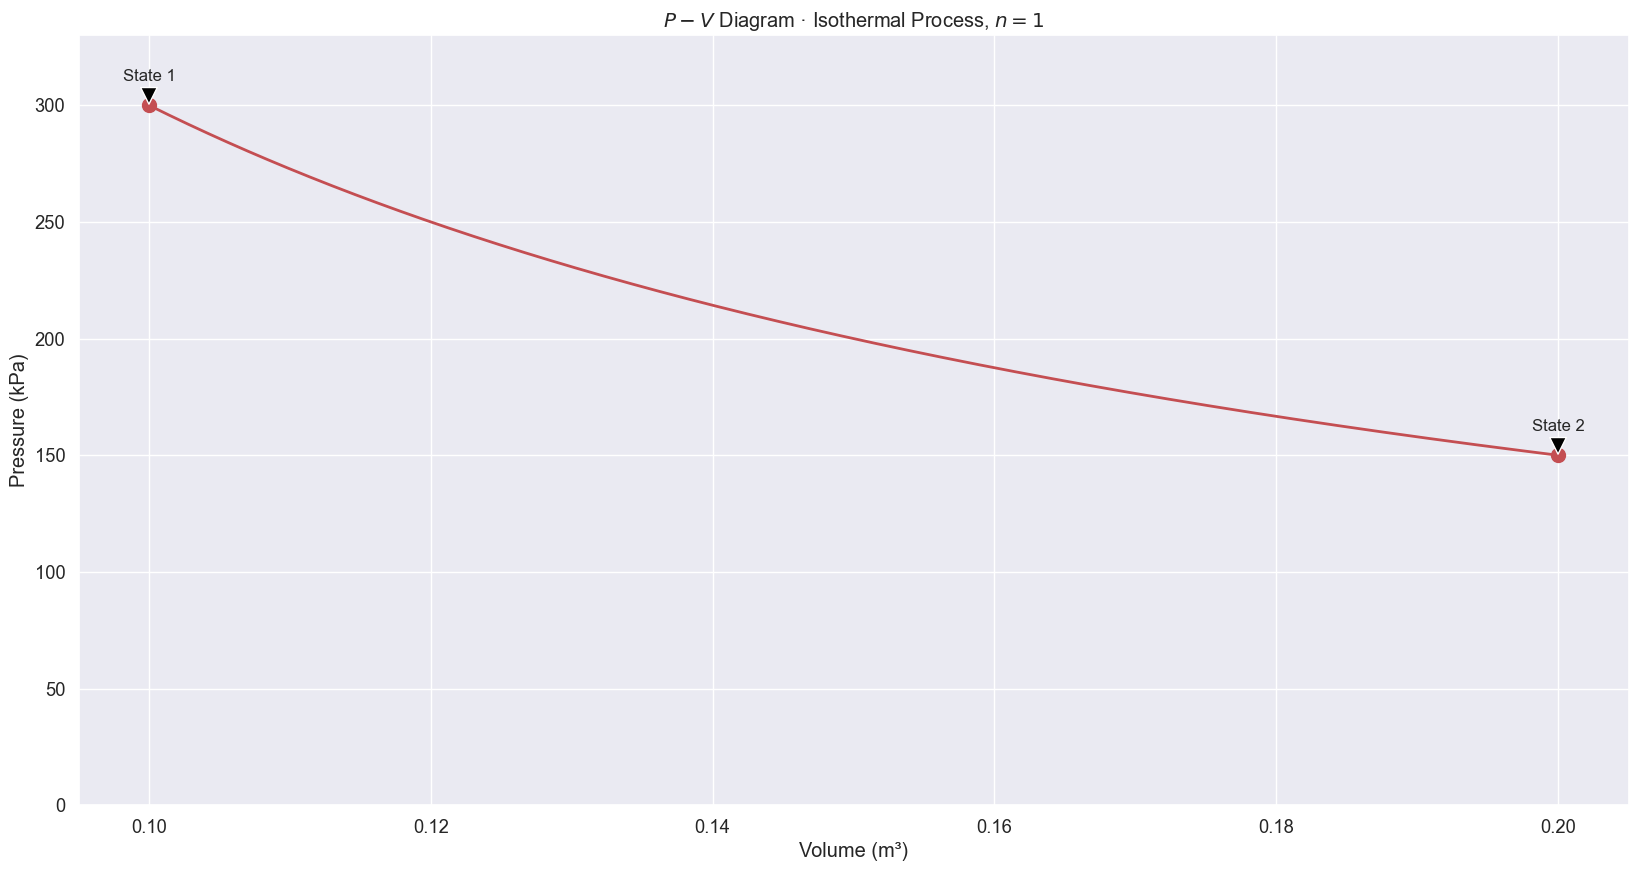

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title(r'$P-V$ Diagram · Isothermal Process, $n = 1$')

# Dynamically adjust the y-axis limit based on max pressure + margin
ax.set_ylim(0, 1.08 * P1)

# Isothermal process plot
ax.plot(V12, P12_isothermal, 'r-', linewidth=2, label='Isobaric Process $n=1$')

# State markers
ax.plot(V1, P1, 'ro', markersize=10)  # State 1
ax.plot(V2, P2_isothermal, 'ro', markersize=10)  # State 2

# Annotations
ax.annotate('State 1', xy=(V1, P1), xytext=(V1, P1 * 1.035),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

ax.annotate('State 2', xy=(V2, P2_isothermal), xytext=(V2, P2_isothermal * 1.07),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

# Set axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel('Volume (m³)')

ax.grid(True)  # Enable grid
# ax.legend()    # Show legend

plt.show()

## Physical Implications and Conclusion

The isothermal process demonstrates a fundamental principle of thermodynamics: the interplay between pressure, volume, and temperature. In this process, the temperature of the system remains constant, highlighting the direct relationship between pressure and volume changes under thermal equilibrium. <br>

In conclusion, the isothermal process is a cornerstone of thermodynamic analysis, exemplifying how energy transfer within a system obeys fundamental physical laws. By exploring both analytical and numerical approaches to calculating work, we can gain a deeper appreciation for the elegance and applicability of thermodynamics in engineering and natural phenomena.

---

# Polytropic (Quasi-adiabatic) Process Analysis: $1 \lt n \lt k$

The polytropic process is characterized by an exponent $n$, where $1 \lt n \lt k$, bridging the gap between isothermal and adiabatic processes. This relationship, $P \: V^n = C$, indicates a more complex interaction between pressure, volume, and temperature.

## Theoretical Background

For a polytropic process with the condition $1 \lt n \lt k$, the work done can be derived from the general polytropic equation:

$$ P \cdot V^n = C \to P = \frac{C}{V^n} $$

$$ W_{1\to2} = \int _1 ^2 P \: dV = C \int _1 ^2 \frac{dV}{V^n} $$

$ W_{1 \to 2} = \frac{C}{1-n} \: \Bigg[ V^{1-n} \Bigg] _{V_1} ^{V_2} $

$$ W_{1 \to 2} = \frac{C}{1-n} \: \Big( V _2 ^{1-n} - V _1 ^{1-n} \Big) $$

$ W_{1 \to 2} = \frac{1}{1-n} \: \Big( \; \; C \; V _2 ^{1-n} \; - \; \; C \; V _1 ^{1-n} \Big) $ <br>

$ W_{1 \to 2} = \frac{1}{1-n} \: \Big[ (P_2 \: V ^n _2) \; V _2 ^{1-n} - (P_1 \: V ^n _1) \; V _1 ^{1-n} \Big] $ <br>

This leads to a specific formula for work done during the process:

$$ W_{1 \to 2} = \frac{1}{1-n} \cdot (P_2 \cdot V_2 - P_1 \cdot V_1) $$

where $P_1$ and $V_1$ are the initial pressure and volume, respectively, and $P_2$ and $V_2$ are the final states.

## Implementation in Python

We start by defining the polytropic exponent and calculating the pressure at state 2 using the given relationship.

In [ ]:
# Define the polytropic exponent within the specified range
n_polytropic = 1.3
print(f'n (polytropic): {n_polytropic}')

n (polytropic): 1.3


### Pressure @ state 2

From the *pressure–volume* relationship:

$$ P_1 \: V ^n _1 = P_2 \: V ^n _2 $$

the pressure at state 2 can be found as

$$ P_2 = P_1 \cdot \Bigg( \frac{V_1}{V_2} \Bigg)^n $$

In [ ]:
# Calculate pressure at state 2 from the polytropic relationship

P2_polytropic = P1 * np.power(V1 / V2, n_polytropic)
print(f'Pressure at State 2 (Polytropic): {np.round(P2_polytropic, 1)} kPa')

Pressure at State 2 (Polytropic): 121.8 kPa


### Work

The work done in this process can be calculated analytically and validated through numerical integration.

$$ W_{\mathrm{polytropic}} = \frac{1}{1-n} \: \Big( P_2 \: V _2 - P_1 \: V _1 \Big) $$

In [ ]:
# Analytical calculation of work for the polytropic process

W_polytropic = 1 / (1 - n_polytropic) * (P2_polytropic * V2 - P1 * V1)
print(f'Work done (Polytropic Process): {W_polytropic:.2f} kJ')

Work done (Polytropic Process): 18.77 kJ


#### Arrays

In [ ]:
# Preparing arrays for numerical integration

points = 500
V12 = np.linspace(V1, V2, points)
P12_polytropic = P1 * np.power(V1 / V12, n_polytropic)

#### Work by numerical integration

Numerical integration gives the following result:

In [ ]:
# Numerical integration to validate work calculation

W_polytropic_numerical = int_method(P12_polytropic, V12)
print(f'Work by Numerical Integration: {W_polytropic_numerical:.2f} kJ')

Work by Numerical Integration: 18.77 kJ


## $P-V$ Diagram

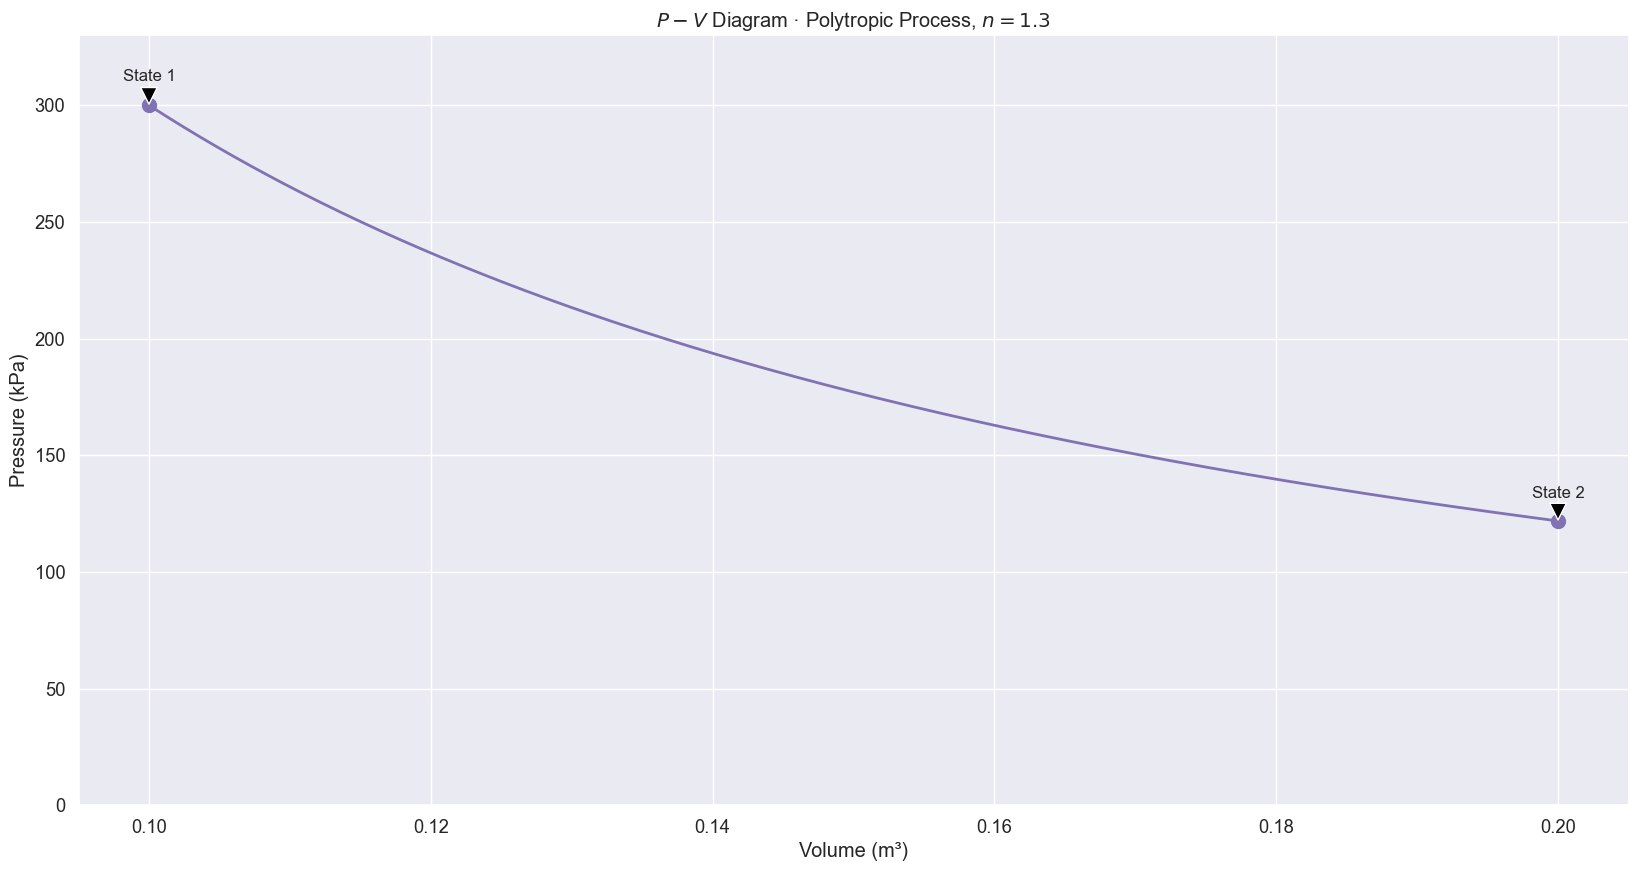

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title(r'$P-V$ Diagram · Polytropic Process, $n = 1.3$')

# Dynamically adjust the y-axis limit based on max pressure + margin
ax.set_ylim(0, 1.08 * P1)

# Polytropic process plot
ax.plot(V12, P12_polytropic,'m-', linewidth=2, label='Polytropic Process, $1 \lt n \lt k$')

# State markers
ax.plot(V1, P1, 'mo', markersize=10)  # State 1
ax.plot(V2, P2_polytropic, 'mo', markersize=10)  # State 2

# Annotations
ax.annotate('State 1', xy=(V1, P1), xytext=(V1, P1 * 1.035),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

ax.annotate('State 2', xy=(V2, P2_polytropic), xytext=(V2, P2_polytropic * 1.08),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

# Set axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel('Volume (m³)')

ax.grid(True)  # Enable grid
# ax.legend()  # Show legend

plt.show()

## Physical Implications and Conclusion

The polytropic process represents a versatile model for analyzing real-world thermodynamic systems where heat transfer and work are interrelated in complex ways. This process allows for an understanding of how varying the polytropic exponent affects system behavior. <br>

In conclusion, exploring the polytropic process provides insights into the adaptable nature of thermodynamic systems, demonstrating the continuum of behaviors between isothermal and adiabatic extremes. The polytropic exponent *n* serves as a critical parameter in defining the system's response to external conditions, highlighting the importance of understanding these relationships in engineering and physics.

---

# $\Delta S = 0$ : Isentropic (Adiabatic) Process $(n = k)$

In thermodynamics, an isentropic or adiabatic process is one where no heat is transferred to or from the system $(Q = 0)$, resulting in constant entropy $(\Delta S = 0)$. <br>

This type of process, crucial for understanding thermodynamics, is characterized by the relationship

$$ P \: V^k = C $$

where $k$ is the specific heat ratio $\left(k = \frac{c_p}{c_v}\right)$.

## Theoretical Background

An adiabatic process can be seen as a polytropic process where $n = k$. Taking this into account, the work done can be derived as follows:

$$ W_{1\to2} = \int _1 ^2 P \: dV = C \int _1 ^2 \frac{dV}{V^k} $$

that leads to a specific formula for work:

$$ W_{1 \to 2} = \frac{1}{1-k} \: \Big( P_2 \: V _2 - P_1 \: V _1 \Big) $$

## Implementation in Python

Let's define the adiabatic exponent *n* as equal to *k*, and calculate the pressure at state 2, along with the work done during the process.

In [ ]:
# Define the adiabatic exponent

k = 1.667
print(f'k = n (adiabatic): {k}')

k = n (adiabatic): 1.667


### Pressure @ state 2

From the *pressure–volume* relationship:

$$ P_1 \: V ^k _1 = P_2 \: V ^k _2 $$

the pressure at state 2 can be found as

$$ P_2 = P_1 \cdot \Bigg( \frac{V_1}{V_2} \Bigg)^k $$

In [ ]:
# Calculate pressure at state 2 using the adiabatic relationship

P2_adiabatic = P1 * np.power(V1 / V2, k)
print(f'Pressure at State 2 (Adiabatic): {np.round(P2_adiabatic, 2)} kPa')

Pressure at State 2 (Adiabatic): 94.47 kPa


### Work

The work done in this process can be calculated analytically as

$$ W_{\mathrm{adiabatic}} = \frac{1}{1-k} \: \Big( P_2 \: V _2 - P_1 \: V _1 \Big) $$

In [ ]:
# Calculate work for the adiabatic process

W_adiabatic = 1 / (1 - k) * (P2_adiabatic * V2 - P1 * V1)
print(f'Work done (Adiabatic Process): {W_adiabatic:.2f} kJ')

Work done (Adiabatic Process): 16.65 kJ


#### Arrays

In [ ]:
points = 500
V12 = np.linspace(V1, V2, points)
P12_adiabatic = P1 * np.power(V1/V12,k)

#### Work by numerical integration

Numerical integration gives the following result:

In [ ]:
W_adiabatic_numerical = int_method(P12_adiabatic, V12)
print(f'W: {W_adiabatic_numerical:.2f} kJ')

W: 16.65 kJ


## $P-V$ Diagram

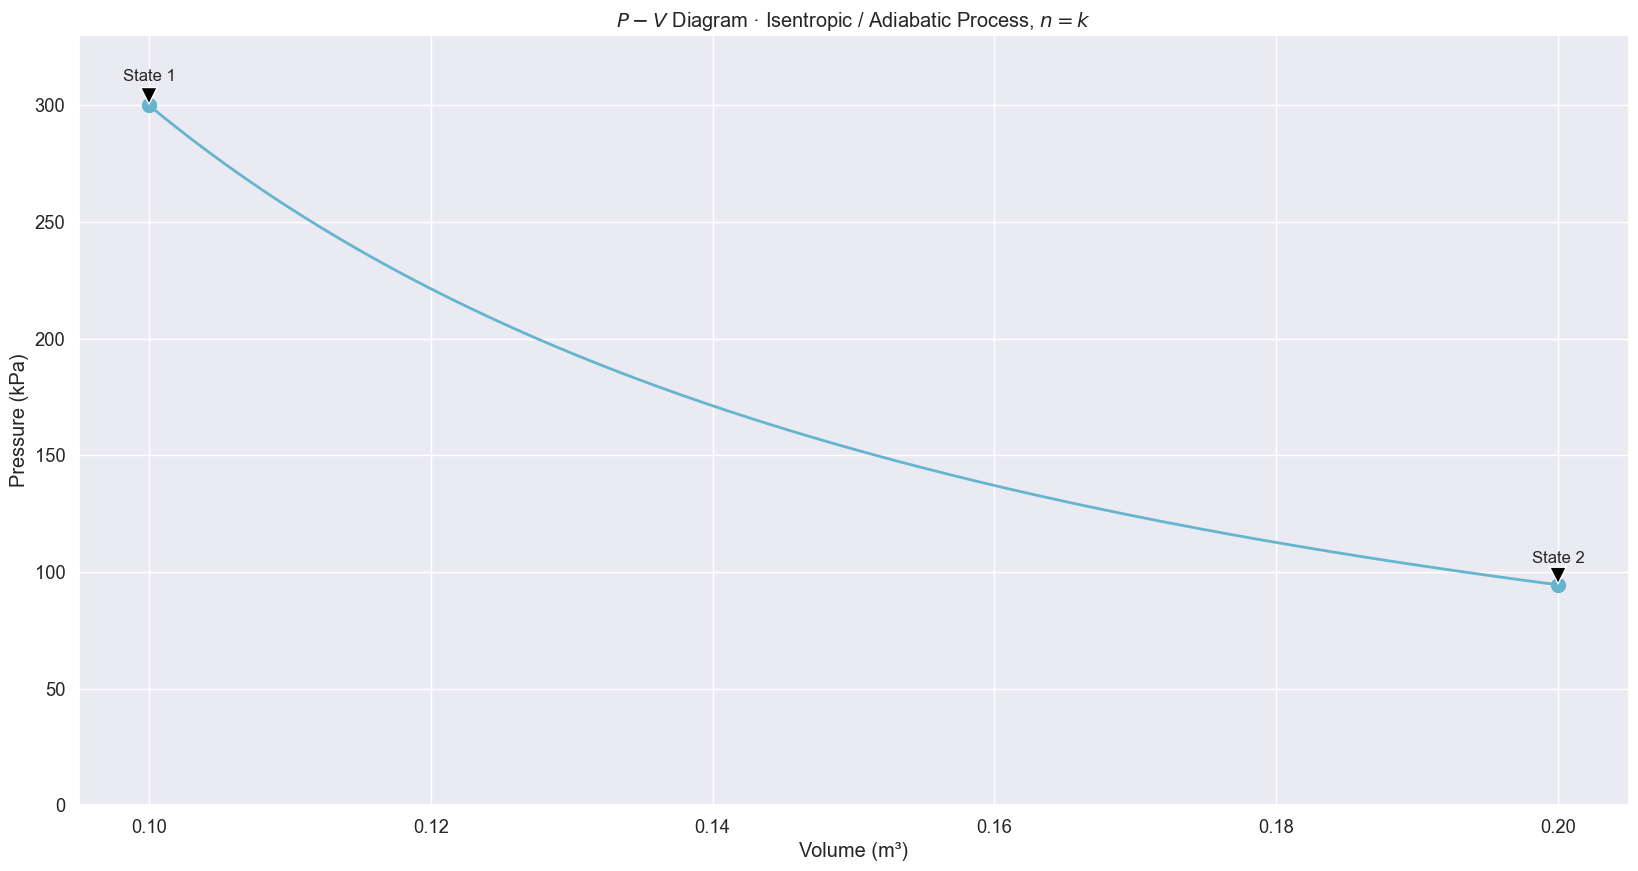

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title(r'$P-V$ Diagram · Isentropic / Adiabatic Process, $n = k$')

# Dynamically adjust the y-axis limit based on max pressure + margin
ax.set_ylim(0, 1.08 * P1)

# Adiabatic process plot
ax.plot(V12, P12_adiabatic,'c-', linewidth=2, label='Adiabatic Process, $n = k$')

# State markers and annotations
ax.plot(V1, P1, 'co', markersize=10)  # State 1
ax.plot(V2, P2_adiabatic, 'co', markersize=10)  # State 2

# Annotations
ax.annotate('State 1', xy=(V1, P1), xytext=(V1, P1 * 1.035),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

ax.annotate('State 2', xy=(V2, P2_adiabatic), xytext=(V2, P2_adiabatic * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

# Set axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel('Volume (m³)')

ax.grid(True)  # Enable grid
# ax.legend()  # Show legend

plt.show()

## Conclusion

Understanding the adiabatic process is fundamental in thermodynamics, highlighting how systems evolve under heat isolation. Correctly applying theoretical principles and verifying through numerical methods enhances our comprehension and application of these concepts in real-world scenarios.

---

# $\Delta V = 0$ : Isochoric Process Analysis $(n = \infty)$

An isochoric process, also known as a constant-volume process, occurs when the volume of a system does not vary with pressure changes. In such processes, the pressure-volume relationship simplifies to $V = C$.

## Theoretical Background

For an isochoric process, we have:

$$ n = \infty \to V = C $$

This results in:

$$ V_1 = V_2 $$

Consequently, the work done during an isochoric process is zero, as work in thermodynamics is calculated through volume change:

$$ W_{1\to2} = \int _1 ^2 P \: dV = 0 $$

## Implementation in Python

The volume at state 2 equals the volume at state 1, emphasizing the isochoric nature of the process.

In [ ]:
# Confirming constant volume in isochoric process

V2_isochoric = V1
print(f'Volume at State 2: {V2_isochoric} m³')

Volume at State 2: 0.1 m³


### Pressure @ state 2

The pressure at state 2, while not directly influencing work done, is evaluated for completeness.

In [ ]:
# The final pressure for this specific problem is arbitrary. Here, we will use P2_adiabatic which was calculated from a previous adiabatic process

P2_isochoric = P2_adiabatic
print(f'Pressure at State 2: {P2_isochoric:.2f} kPa')

Pressure at State 2: 94.47 kPa


### Work

In an isochoric process, since the volume does not change, the work done is inherently zero.

$$ W_{\mathrm{isochoric}} = 0 $$

In [ ]:
# Work in an isochoric process is always zero
W_isochoric = 0
print(f'Work done (Isochoric Process): {W_isochoric} kJ')

Work done (Isochoric Process): 0 kJ


#### Arrays

In [ ]:
# Preparing arrays for a hypothetical numerical integration

points = 500
V12_isochoric = np.linspace(V1, V2_isochoric, points)
P12_isochoric = np.linspace(P1, P2_isochoric, points)

#### Work by numerical integration

The attempt to calculate work through numerical integration in an isochoric process might seem counterintuitive since the work is theoretically zero due to no volume change. For educational purposes, demonstrating numerical integration in an isochoric process could involve calculating the area under a pressure-volume curve, which, by definition, should be zero for constant volume.

In [ ]:
# Expected result of numerical integration in an isochoric process

W_isochoric_numerical = int_method(P12_isochoric, V12_isochoric)
print(f'Expected Work (Isochoric Process): {W_isochoric_numerical:.2f} kJ')

Expected Work (Isochoric Process): 0.00 kJ


## $P-V$ Diagram

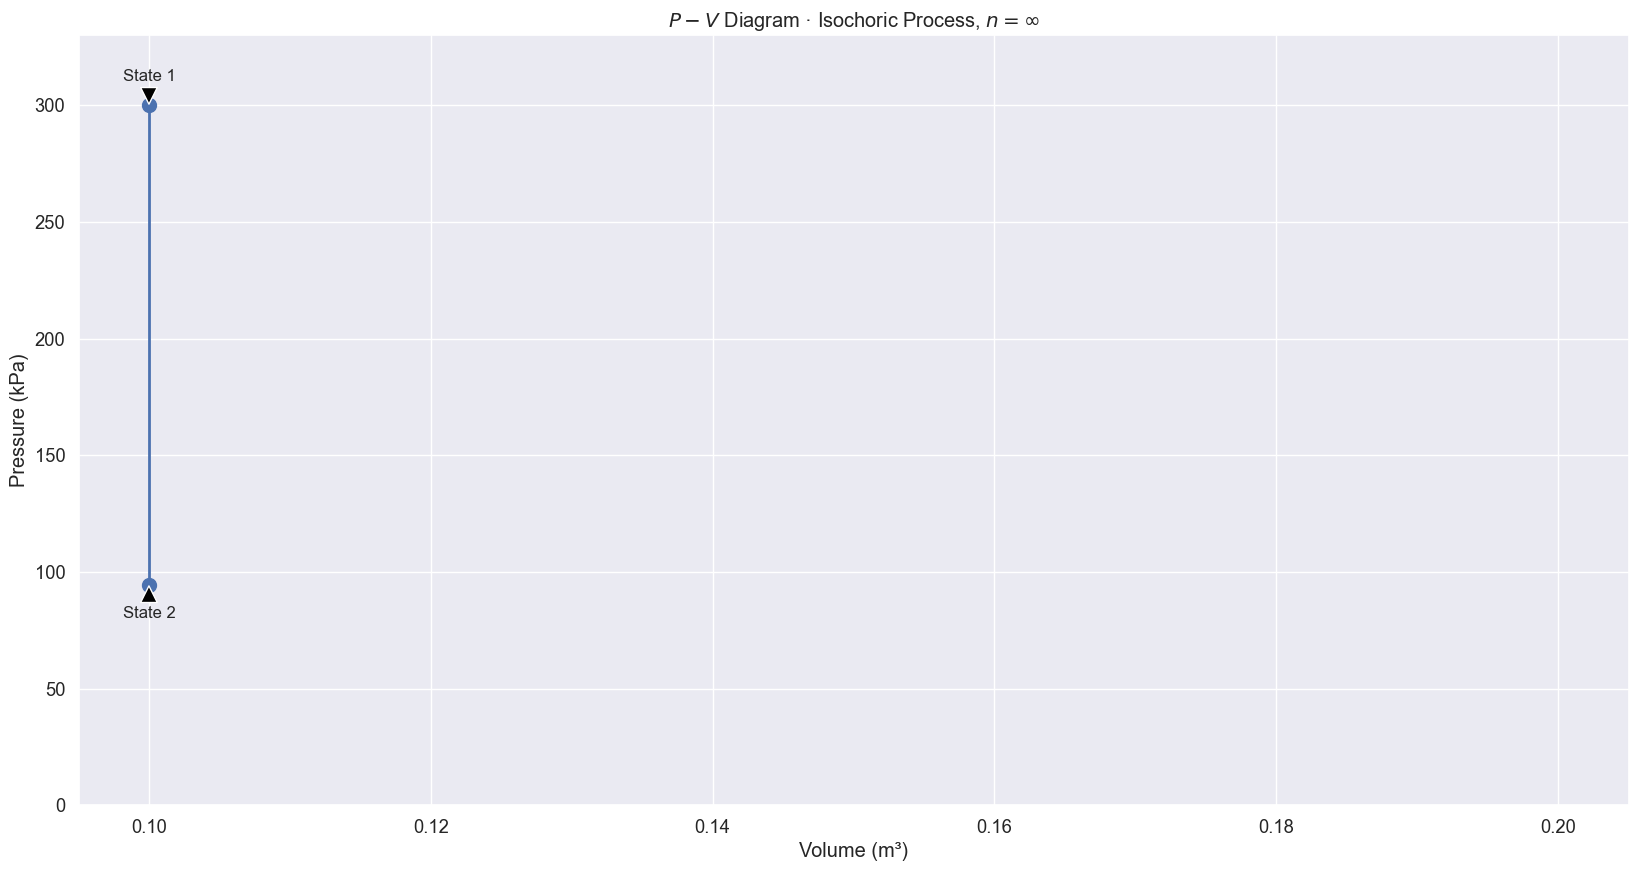

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title(r'$P-V$ Diagram · Isochoric Process, $n = \infty$')

# Dynamically adjust the y-axis limit based on max pressure + margin, and the x-axis limit based on min pressure - margin and max pressure + margin
ax.set_ylim(0, 1.08 * P1)
ax.set_xlim(0.95 * V1, 1.025 * V2)

# Isochoric process plot
ax.plot(V12_isochoric, P12_isochoric,'b-', linewidth=2, label='Isochoric Process, $n = \infty$')

# State markers
ax.plot(V1, P1, 'bo', markersize=10)  # State 1
ax.plot(V2_isochoric, P2_isochoric, 'bo', markersize=10)  # State 2

# Annotations
ax.annotate('State 1', xy=(V1, P1), xytext=(V1, P1 * 1.035),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

ax.annotate('State 2', xy=(V2_isochoric, P2_isochoric), xytext=(V2_isochoric, P2_isochoric * 0.85),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

# Set axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel('Volume (m³)')

ax.grid(True)  # Enable grid
# ax.legend()  # Show legend

plt.show()

## Conclusion

The isochoric process highlights a fundamental principle where no work is done in the absence of volume change. This underscores the importance of accurately applying thermodynamic concepts and the role of numerical methods in validating theoretical predictions.

# Summary

## Comprehensive $P-V$ Diagram

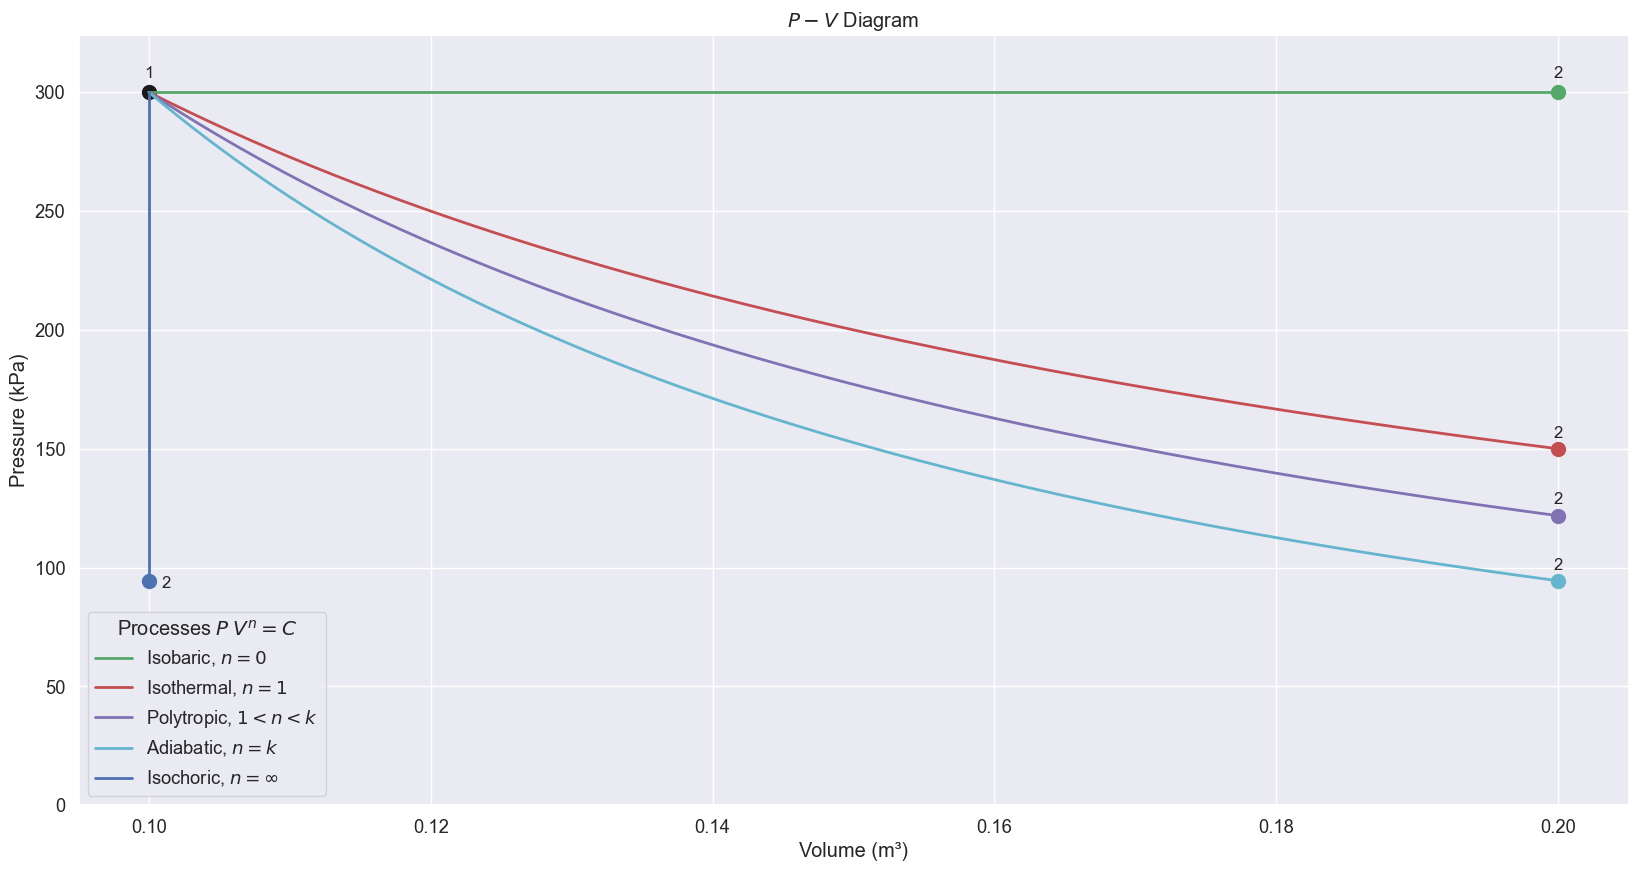

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.set_title(r'$P-V$ Diagram')

# Dynamically adjust the y-axis limit based on max pressure + margin, and the x-axis limit based on min pressure - margin and max pressure + margin
ax.set_ylim(0, 1.08 * P1)
ax.set_xlim(0.95 * V1, 1.025 * V2)


# Marker and annotation for state 1
ax.plot(V1, P1, 'ko', markersize=10)  # State 1

ax.annotate('1', xy=(V1, P1), xytext=(V1, P1 * 1.02),
             fontsize=12, ha='center')


# Isobaric process
ax.plot(V12, P12_isobaric, 'g-', linewidth=2, label=r'Isobaric, $n=0$')

# state 2
ax.plot(V2, P2_isobaric, 'go', markersize=10)

ax.annotate('2', xy=(V2, P2_isobaric), xytext=(V2, P2_isobaric * 1.02),
             fontsize=12, ha='center')


# Isothermal process

ax.plot(V12, P12_isothermal, 'r-', linewidth=2, label=r'Isothermal, $n = 1$')

# state 2
ax.plot(V2, P2_isothermal, 'ro', markersize=10)

ax.annotate('2', xy=(V2, P2_isothermal), xytext=(V2, P2_isothermal * 1.03),
             fontsize=12, ha='center')


# Polytropic process

ax.plot(V12, P12_polytropic, 'm-', linewidth=2, label=r'Polytropic, $1 < n < k$')

# state 2
ax.plot(V2, P2_polytropic, 'mo', markersize=10)

ax.annotate('2', xy=(V2, P2_polytropic), xytext=(V2, P2_polytropic * 1.04),
             fontsize=12, ha='center')


# Adiabatic process

ax.plot(V12, P12_adiabatic, 'c-', linewidth=2, label=r'Adiabatic, $n = k$')

# state 2
ax.plot(V2, P2_adiabatic, 'co', markersize=10)

ax.annotate('2', xy=(V2, P2_adiabatic), xytext=(V2, P2_adiabatic * 1.05),
             fontsize=12, ha='center')


#Isochoric process

ax.plot(V12_isochoric, P12_isochoric, 'b-', linewidth=2, label=r'Isochoric, $n = \infty$')

# state 2
ax.plot(V2_isochoric, P2_isochoric, 'bo', markersize=10)

ax.annotate('2', xy=(V2, P2_isochoric), xytext=(V2_isochoric * 1.012, P2_isochoric * 0.97),
             fontsize=12, ha='center')


# Set axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel('Volume (m³)')

ax.grid(True)  # Enable grid
ax.legend(title=r'Processes $P \: V^n = C$')  # Show legend

plt.show()

### Explanation for the $P−V$ Diagram

This $P−V$ diagram encapsulates the essence of various thermodynamic processes discussed, showcasing their unique paths in the pressure-volume space. Each process is distinguished by a specific relationship between pressure and volume, influenced by the polytropic exponent *n*. The diagram serves as a visual summary, illustrating how these processes transition from state 1 to state 2 under different conditions. <br>

State points are marked to indicate the initial and final conditions for each process, with *'2'* signifying the end state. These markers provide reference points to understand the direction and extent of each transformation.

#### Isobaric Process $(n = 0)$
Represented by the green line, this process occurs at constant pressure. The linear path in the volume axis highlights the lack of pressure change, despite variations in volume.

#### Isothermal Process $(n = 1)$
The red curve illustrates an isothermal transformation, where temperature —and consequently, the product *PV*— remains constant. This process is marked by the inverse relationship between pressure and volume.

#### Polytropic Process $(1 \lt n \lt k)$
Shown in magenta, the polytropic path represents a general case encompassing a range of processes, depending on the value of *n*. This curve sits between the isothermal and adiabatic processes, indicating variable pressure and volume relations.

#### Adiabatic Process $(n = k)$
The cyan line depicts an adiabatic (or isentropic) process, characterized by no heat exchange $(Q=0)$. The steepness of the curve signifies important pressure changes for small volume variations, emphasizing the insulation of the system.

#### Isochoric Process $(n = \infty)$
Illustrated by the blue vertical line, this process involves no change in volume. The pressure change is represented vertically, indicating volume constancy throughout the transformation. <br>

## $P-V$ Diagram + Work Equations

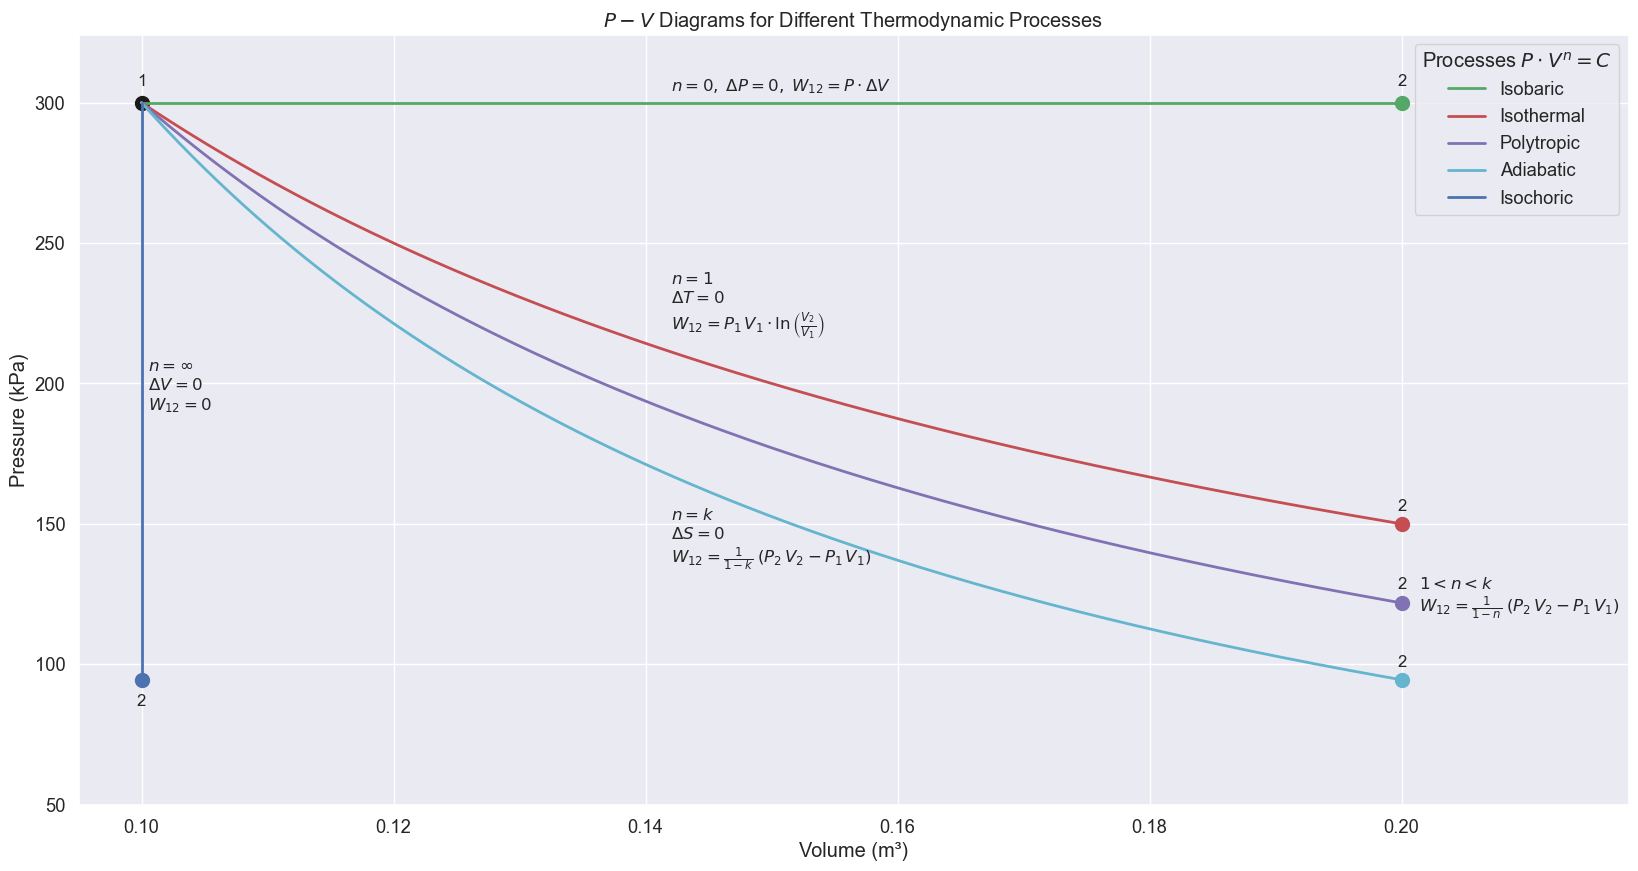

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.set_title(r'$P-V$ Diagrams for Different Thermodynamic Processes')

# Dynamically adjust the y-axis limit based on max pressure + margin, and the x-axis limit based on min pressure - margin and max pressure + margin
ax.set_ylim(0.166 * P1, 1.08 * P1)
ax.set_xlim(0.950 * V1, 1.09 * V2)

# Marker and annotation for state 1
ax.plot(V1, P1, 'ko', markersize=10)  # State 1

ax.annotate('1', xy=(V1, P1), xytext=(V1, P1 * 1.02),
             fontsize=12, ha='center')


# Isobaric process

ax.plot(V12, P12_isobaric,'g-', linewidth=2, label='Isobaric')

# state 2
ax.plot(V2, P2_isobaric, 'go', markersize=10)

ax.annotate('2', xy=(V2, P2_isobaric), xytext=(V2, P2_isobaric * 1.02),
             fontsize=12, ha='center')

# text
isobaric_text = (r'$n = 0, \; \Delta P = 0, \; W_{12} = P \cdot \Delta V$')

ax.text(0.71 * V2, 1.03 * P1, isobaric_text, fontsize=12, verticalalignment='top')


# Isothermal process

ax.plot(V12, P12_isothermal, 'r-', linewidth=2, label='Isothermal')

# state 2
ax.plot(V2, P2_isothermal, 'ro', markersize=10)

ax.annotate('2', xy=(V2, P2_isothermal), xytext=(V2, P2_isothermal * 1.03),
             fontsize=12, ha='center')

# text
isothermal_text = (
    r'$n = 1$' + '\n' +
    r'$\Delta T = 0$' + '\n' +
    r'$W_{12} = P_1 \, V_1 \cdot \ln\left(\frac{V_2}{V_1}\right)$'
)

ax.text(0.71 * V2, 1.60 * P2_isothermal, isothermal_text, fontsize=12, verticalalignment='top')


# Polytropic process

ax.plot(V12, P12_polytropic, 'm-', linewidth=2, label='Polytropic')

# state 2
ax.plot(V2, P2_polytropic, 'mo', markersize=10)

ax.annotate('2', xy=(V2, P2_polytropic), xytext=(V2, P2_polytropic * 1.04),
             fontsize=12, ha='center')

# text
polytropic_text = (
    r'$1 < n < k$' + '\n' +
    r'$W_{12} = \frac{1}{1-n} \: (P_2 \, V_2 - P_1 \, V_1)$'
)

ax.text(1.007 * V2, 1.08 * P2_polytropic, polytropic_text, fontsize=12, verticalalignment='top')


# Adiabatic process

ax.plot(V12, P12_adiabatic,'c-', linewidth=2, label='Adiabatic')

# state 2
ax.plot(V2, P2_adiabatic, 'co', markersize=10)

ax.annotate('2', xy=(V2, P2_adiabatic), xytext=(V2, P2_adiabatic * 1.05),
             fontsize=12, ha='center')

# text
adiabatic_text = (
    r'$n = k$' + '\n' +
    r'$\Delta S = 0$' + '\n' +
    r'$W_{12} = \frac{1}{1-k} \: (P_2 \, V_2 - P_1 \, V_1)$'
)

ax.text(0.71 * V2, 1.65 * P2_adiabatic, adiabatic_text, fontsize=12, verticalalignment='top')


# Isochoric process

ax.plot(V12_isochoric, P12_isochoric,'b-', linewidth=2, label='Isochoric')

# state 2
ax.plot(V2_isochoric, P2_isochoric, 'bo', markersize=10)

ax.annotate('2', xy=(V2_isochoric, P2_isochoric), xytext=(V2_isochoric, 0.9 * P2_isochoric),
             fontsize=12, ha='center')

# text
isochoric_text = (
    r'$n = \infty$' + '\n' +
    r'$\Delta V = 0$' + '\n' +
    r'$W_{12} = 0$'
)

ax.text(1.005 * V2_isochoric, 2 * P2_isochoric, isochoric_text, fontsize=12, verticalalignment='bottom')


# Set axis labels
ax.set_ylabel('Pressure (kPa)')
ax.set_xlabel('Volume (m³)')

ax.legend(title=r'Processes $P \cdot V^n = C$')

plt.show()

In the thermodynamic processes examined (with the exception of the adiabatic process), the identity of the gas (or liquid) within the piston-cylinder assembly is not essential for determining the work $(W)$ performed. This calculation hinges primarily on the chosen path of the process and the initial and final states of the system. However, for the assessment of other properties, such as temperature, both the specific nature and the quantity of the substance in question become crucial. This is because accurate evaluations require the application of relations that are unique to the properties of the specific substance involved.

In [ ]:
# Assuming the variables n_isobaric, n_isothermal, etc., and their corresponding P2 and W values are already defined

# Define the header
header = f"{'Process':<12} | {'n':<5} | {'P₂ (kPa)':<10} | {'W (kJ)':<10}"
print(header)
print("-" * len(header))

# Define each process result
isobaric_result   = f"{'Isobaric':<12}   | {n_isobaric:<5}   | {np.round(P2_isobaric,1):<10}   | {np.round(W_isobaric,1):<10}"
isothermal_result = f"{'Isothermal':<12} | {n_isothermal:<5} | {np.round(P2_isothermal,1):<10} | {np.round(W_isothermal,1):<10}"
polytropic_result = f"{'Polytropic':<12} | {n_polytropic:<5} | {np.round(P2_polytropic,1):<10} | {np.round(W_polytropic,1):<10}"
adiabatic_result  = f"{'Adiabatic':<12}  | {k:<5}            | {np.round(P2_adiabatic,1):<10}  | {np.round(W_adiabatic,1):<10}"
isochoric_result  = f"{'Isochoric':<12}  | {'∞':<5}          | {np.round(P2_isochoric,1):<10}  | {np.round(W_isochoric,1):<10}"

# Print each process result
print(isobaric_result)
print(isothermal_result)
print(polytropic_result)
print(adiabatic_result)
print(isochoric_result)


Process      | n     | P₂ (kPa)   | W (kJ)    
----------------------------------------------
Isobaric     | 0     | 300        | 30.0      
Isothermal   | 1.0   | 150.0      | 20.8      
Polytropic   | 1.3   | 121.8      | 18.8      
Adiabatic    | 1.667 | 94.5       | 16.7      
Isochoric    | ∞     | 94.5       | 0         


In [ ]:
data = [
        (n_isobaric  , np.round(P2_isobaric,1)  , np.round(W_isobaric,1))  ,
        (n_isothermal, np.round(P2_isothermal,1), np.round(W_isothermal,1)),
        (n_polytropic, np.round(P2_polytropic,1), np.round(W_polytropic,1)),
        (k           , np.round(P2_adiabatic,1) , np.round(W_adiabatic,1))  ,
        ("∞"         , np.round(P2_isochoric,1) , np.round(W_isochoric,1))
        ]

processes = pd.DataFrame(data, columns=["n", "P₂ (kPa)", "W (kJ)"])

processes.index = ["Isobaric", "Isothermal", "Polytropic", "Adiabatic", "Isochoric"]

processes

# Skills Developed

## Specific Learning Outcomes

1. **Apply Problem-solving Methodology**: Enhanced the ability to approach complex thermodynamic problems systematically, from understanding the problem statement to applying mathematical and physical principles for solutions.

2. **Understand Closed Systems**: Gained insights into defining closed thermodynamic systems and identifying energy interactions across their boundaries, crucial for analyzing system behavior under various processes.

3. **Evaluate Work for Different Processes**: Developed the capability to calculate the work done during isobaric, isothermal, polytropic, adiabatic, and isochoric processes, applying the fundamental equation $P \cdot V^n = \mathsf{constant}$.

4. **Pressure-Volume Relationship Application**: Mastered the application of the pressure-volume relationship across different thermodynamic processes, understanding how variations in *n* affect system properties and work done.

5. **Visualization and Interpretation of Data**: Improved the ability to visually represent thermodynamic processes through $P-V$ diagrams, aiding in the interpretation and comparison of the physical implications of each process, and enhancing analytical thinking.

6. **Numerical and Analytical Skills**: While directly applying thermodynamic equations, also improved numerical analysis skills through computational methods like numerical integration, familiarity with libraries such as NumPy and matplotlib for data analysis and visualization, and enhancing proficiency in using Python for scientific calculations.

7. **Scientific Communication**: Improved ability to communicate complex scientific ideas clearly through written explanations, annotations, and visual presentations, enhancing technical writing and presentation skills.

## General Learning Outcomes

1. **Understanding Fundamental Thermodynamic Principles**: Gained a deep understanding of key thermodynamic processes, including isobaric, isothermal, polytropic, adiabatic, and isochoric transformations, and their implications on system behavior.

2. **Application of Mathematical and Physical Concepts**: Developed the ability to apply mathematical concepts such as integration and logarithmic functions to solve practical thermodynamics problems, enhancing problem-solving skills in physics.

5. **Critical Thinking and Analytical Reasoning**: Enhanced critical thinking by comparing different thermodynamic processes and assessing their efficiency and implications, fostering a deeper understanding of energy systems.

7. **Attention to Detail**: Cultivated a meticulous approach to scientific investigation, from careful calculation of thermodynamic properties to precise plotting of process paths.

8. **Thermodynamics in Practice**: Gained insights into the practical applications of thermodynamic principles in engineering and technology, understanding how these processes impact real-world systems.

9. **Research and Self-learning**: Developed research skills by exploring additional resources and literature on thermodynamics, fostering a self-learning attitude towards new scientific concepts.

10. **Interdisciplinary Integration**: Recognized the interdisciplinary nature of thermodynamics, touching on physics, engineering, and environmental science, promoting a holistic view of scientific study.